In [7]:
import pandas as pd

# Load data, either .csv or .feather
data_df = pd.read_csv("banknote_net.csv", index_col=0)


# Total numbe of images
print(f"Total number of images is {len(data_df)}")

# Unique number of currencies
print(f"Total number of currencies is {len(data_df.Currency.unique())}")

# Unique number of denominations (including back and front of each banknote)
combined_series = data_df.Currency + data_df.Denomination # combination of currency and denomination
print(f"Total number of denominations is {int(len(combined_series.unique()) / 2)}")

# Inspect data structure
data_df.head(15)

Total number of images is 24826
Total number of currencies is 17
Total number of denominations is 112


,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255,Currency,Denomination
0,0.000000,0.802783,4.799193,3.520272,3.906448,2.964886,2.276473,0.472117,0.000000,0.351116,...,0.319955,5.005167,5.144637,0.000000,0.717125,0.0,4.724614,0.000000,AUD,100_1
1,1.282011,0.169436,4.367540,4.476254,5.645983,2.173897,0.638572,0.000000,0.149849,0.516939,...,0.671412,4.548221,2.671707,0.000000,0.317925,0.0,2.648906,0.656381,AUD,100_1
2,1.956406,0.000000,5.244660,3.611655,5.085964,3.766434,0.000000,1.865016,2.853455,1.840774,...,0.434040,6.429610,2.465012,0.000000,0.197883,0.0,0.823947,1.539916,AUD,100_1
3,0.382722,3.727718,4.409414,3.093557,6.277169,0.000000,1.368437,0.000000,1.095514,0.958835,...,2.279172,4.439319,0.273129,0.438889,2.423372,0.0,1.724243,0.000000,AUD,100_1
4,0.619588,0.071276,3.780865,3.637381,4.144943,3.829269,0.811821,0.387360,1.005720,1.084254,...,0.000000,6.559031,4.807416,0.017139,0.000000,0.0,2.969594,0.000000,AUD,100_1
5,0.078776,0.644733,2.710341,2.106869,3.037229,4.366678,0.802116,1.219890,1.602621,0.842361,...,0.575059,5.737626,3.718403,0.000000,0.351575,0.0,3.243896,0.000000,AUD,100_1
6,1.471466,0.000000,2.497013,2.721815,3.963496,4.339762,0.898919,1.321742,0.673099,0.845716,...,0.000000,4.615301,3.797620,0.044359,0.000000,0.0,3.043229,0.000000,AUD,100_1
7,1.040910,0.000000,4.119106,4.077905,3.483957,2.926373,0.000000,0.000000,1.758486,1.922651,...,1.237029,7.756765,2.139086,0.000000,1.238276,0.0,3.162983,0.043580,AUD,100_1
8,0.000000,0.408692,3.717778,3.311307,2.718847,2.629820,0.877763,0.296808,1.738931,0.335870,...,1.537544,6.442374,2.173676,0.000000,1.171402,0.0,3.257974,0.000000,AUD,100_1
9,0.225071,0.611859,3.646192,1.171887,2.443441,4.118752,0.973302,0.642363,1.496193,0.830227,...,0.639099,6.434539,3.712054,0.000000,0.540613,0.0,1.862063,0.000000,AUD,100_1


Each row correspond to a single image embedding with 256 columns and two columns for labels of currency and denomination + orientation. For example we interpret the label for the first images as a front image ("_1" in **Denomination** column) of a 100 (**Denomination** column) Australian Dollar ("AUD" in the **Currency** column) banknote:

In [8]:
data_df[['Currency', 'Denomination']].head(1)

,Currency,Denomination
0,AUD,100_1


This first images has the following embedding vector:

In [9]:
data_df.iloc[0,:-2].values

array([0.0, 0.8027835, 4.799193, 3.520272, 3.9064476, 2.9648864, 2.276473,
       0.47211692, 0.0, 0.35111558, 0.0, 2.2183979, 3.4520917, 0.83746207,
       0.58934647, 0.0, 4.9861035, 5.4925585, 1.4588469, 0.0, 3.489703,
       2.0271468, 3.2467875, 0.20810941, 0.0, 5.786528, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.30830503, 0.0, 0.0, 1.4977591, 0.0, 0.0, 4.472261,
       1.1813817, 0.55179024, 1.8769553, 0.0, 1.6960094, 0.0, 0.0,
       4.5650682, 2.1459768, 0.0, 0.14740546, 0.79103965, 0.84239817, 0.0,
       4.7781177, 0.32338044, 0.0, 0.48930162, 3.5197105, 0.78288394, 0.0,
       0.0, 0.0, 2.6619043, 0.0, 0.0, 3.6079109, 0.0, 4.060853, 2.2505634,
       0.60135585, 0.18607168, 1.3715869, 0.64887375, 0.27316225,
       0.36734194, 0.0, 5.0756264, 0.0, 4.2755203, 2.624832, 2.2092624,
       0.0, 1.591869, 5.860719, 0.0, 1.7688321, 6.443147, 0.0, 0.0,
       5.7725053, 7.610737, 3.1365225, 0.0, 0.6722092, 0.0, 0.0, 4.861666,
       2.0534236, 5.0753584, 0.6301162, 3.4043784, 0.07024629, 0

#### Exploring reprentations

Let's visualize the representations for some currencies as t-SNE embeddings:

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Choose certain currencies for easier visualization
embedding = data_df.copy(deep=True)
embedding = embedding[
    (embedding["Currency"] == "AUD")
    | (embedding["Currency"] == "USD")
    | (embedding["Currency"] == "EUR")
    | (embedding["Currency"] == "BRL")
    | (embedding["Currency"] == "TRY")
]

# Save currency labels and separate labels from embeddings
labels = embedding["Currency"]
embedding = embedding.drop(["Currency", "Denomination"], axis=1)

# Train t-SNE embedding
X = TSNE(n_components=2, perplexity=20.0, n_iter=1000).fit_transform(embedding) # compute t-SNE representation


Let's plot the embeddings now, the images should cluster nicely

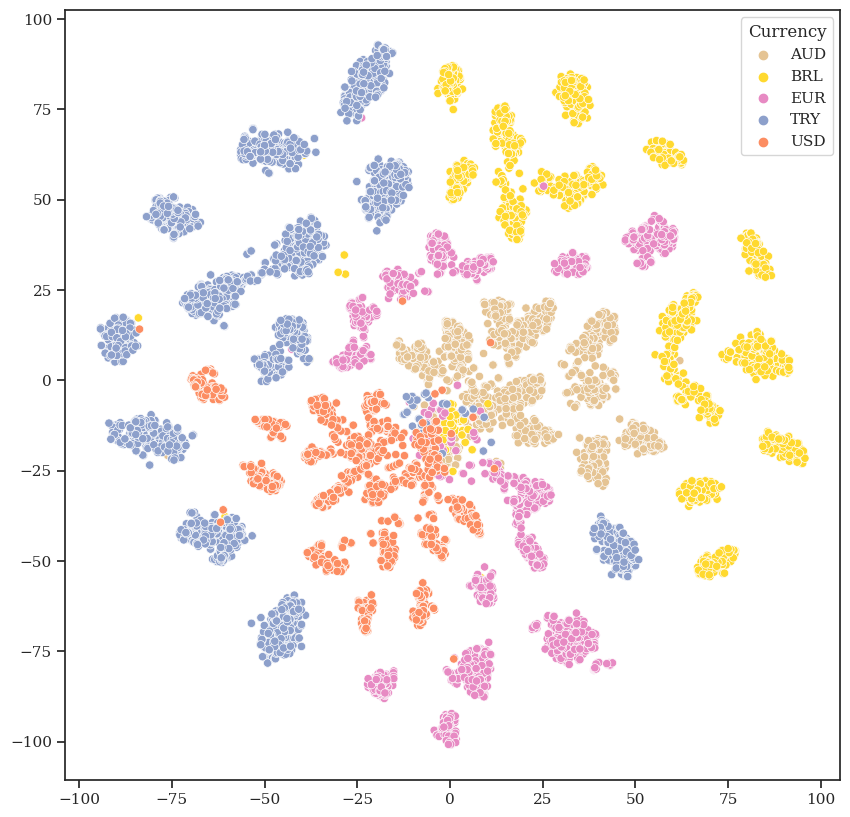

In [13]:
# Make plots
sns.set(font="serif", style="ticks", rc={"figure.figsize": (10, 10)}, context="notebook")
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=labels,
    palette="Set2_r",
)
# Save figure
plt.savefig('embedding_vis.png', dpi=300)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('banknote_net.csv')

# Extract features and labels
X = df.iloc[:, :-3].values  # 256-dimensional vectors
y_currency = df['Currency'].values
y_denomination = df['Denomination'].str.extract(r'(\d+)')[0].astype(int)  # Extract numerical part of denomination
y_orientation = df['Denomination'].str.extract(r'_(\d)')[0].astype(int)  # Extract orientation

# Encode labels
currency_encoder = LabelEncoder()
denomination_encoder = LabelEncoder()
orientation_encoder = LabelEncoder()

y_currency_encoded = currency_encoder.fit_transform(y_currency)
y_denomination_encoded = denomination_encoder.fit_transform(y_denomination)
y_orientation_encoded = orientation_encoder.fit_transform(y_orientation)

# Train-test split
X_train, X_test, y_currency_train, y_currency_test, y_denomination_train, y_denomination_test, y_orientation_train, y_orientation_test = train_test_split(
    X, y_currency_encoded, y_denomination_encoded, y_orientation_encoded, test_size=0.2, random_state=42
)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Load the dataset
data_df = pd.read_csv('banknote_net.csv')

# Extract features and labels
X = data_df.iloc[:, :-3].values  # 256-dimensional vectors
y_currency = data_df['Currency'].values
y_denomination = data_df['Denomination'].str.extract(r'(\d+)')[0].astype(int)  # Extract numerical part of denomination
y_orientation = data_df['Denomination'].str.extract(r'_(\d)')[0].astype(int)  # Extract orientation
# Replace 'NaN' strings with actual NaN values and handle them
data_df['Denomination'] = data_df['Denomination'].replace('NaN', pd.NA)
data_df['Denomination'] = data_df['Denomination'].astype(float)  # Convert to float to handle NaNs
# Encode labels
currency_encoder = LabelEncoder()
denomination_encoder = LabelEncoder()
orientation_encoder = LabelEncoder()

y_currency_encoded = currency_encoder.fit_transform(y_currency)
y_denomination_encoded = denomination_encoder.fit_transform(y_denomination)
y_orientation_encoded = orientation_encoder.fit_transform(y_orientation)
# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# Train-test split
X_train, X_test, y_currency_train, y_currency_test, y_denomination_train, y_denomination_test, y_orientation_train, y_orientation_test = train_test_split(
    X, y_currency_encoded, y_denomination_encoded, y_orientation_encoded, test_size=0.2, random_state=42
)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
currency_classifier = RandomForestClassifier(random_state=42)
denomination_classifier = RandomForestClassifier(random_state=42)
orientation_classifier = RandomForestClassifier(random_state=42)

# Train classifiers
currency_classifier.fit(X_train, y_currency_train)
denomination_classifier.fit(X_train, y_denomination_train)
orientation_classifier.fit(X_train, y_orientation_train)


RandomForestClassifier(random_state=42)

Currency Classification Report:
              precision    recall  f1-score   support

         AUD       0.99      1.00      1.00       322
         BRL       1.00      0.99      0.99       441
         CAD       0.99      0.98      0.99       245
         EUR       0.98      0.97      0.98       386
         GBP       0.99      0.91      0.95       211
         IDR       0.99      0.99      0.99       241
         INR       0.89      0.99      0.94       374
         JPY       0.99      0.98      0.99       321
         MXN       0.97      0.95      0.96       218
         MYR       1.00      0.99      1.00       238
         NNR       0.95      0.92      0.94       184
         NZD       0.96      0.98      0.97       222
         PHP       1.00      1.00      1.00       235
         PKR       1.00      0.96      0.98       226
         SGD       1.00      0.99      0.99       200
         TRY       0.99      1.00      1.00       598
         USD       1.00      1.00      1.00      

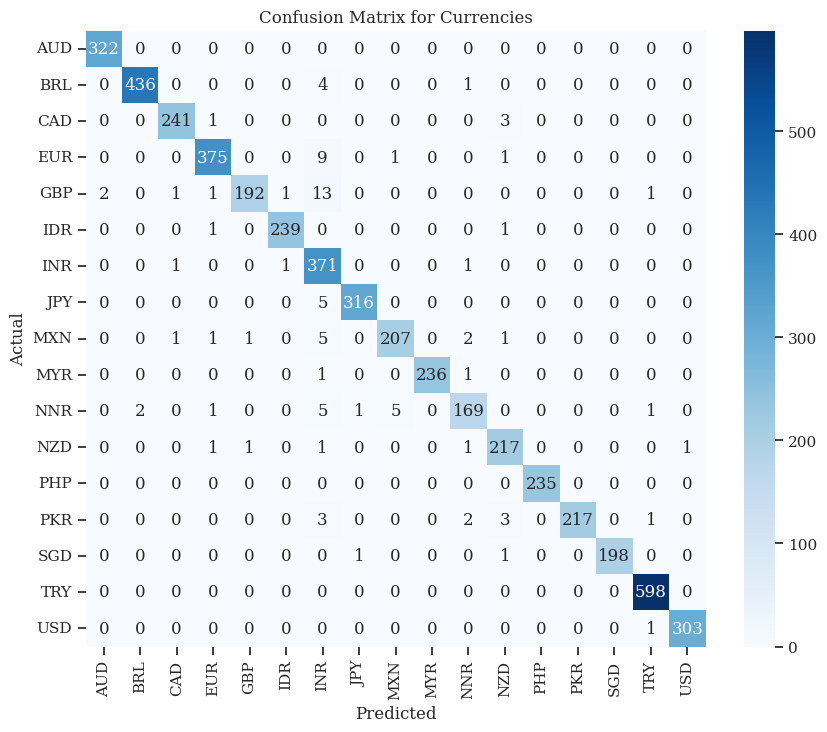

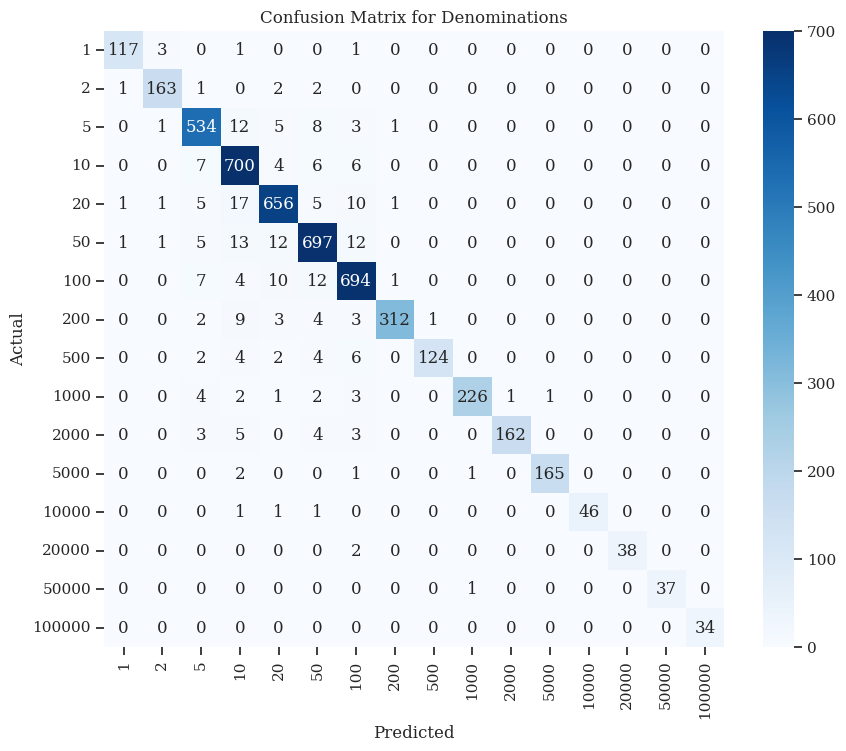

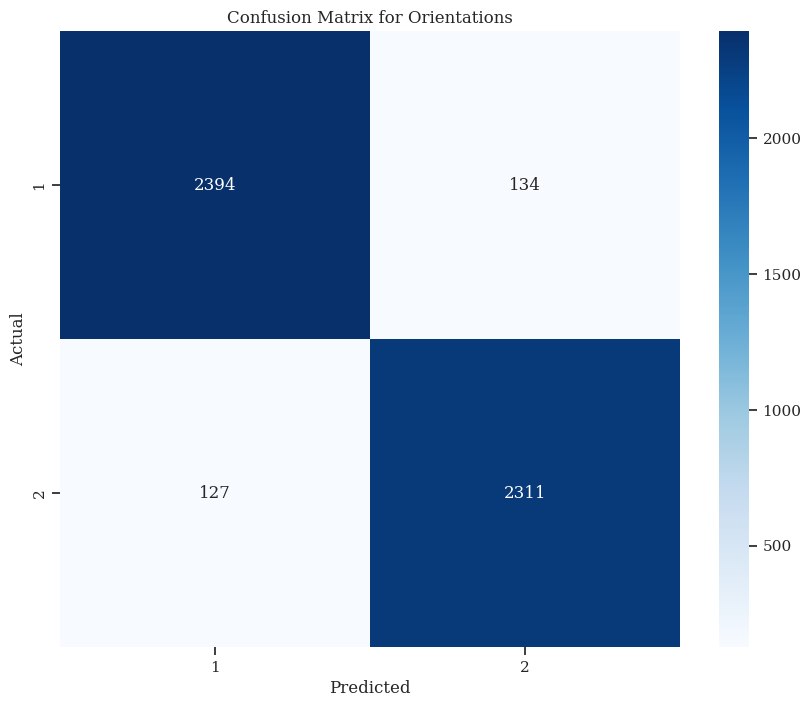

In [16]:
# Predict on the test set
y_currency_pred = currency_classifier.predict(X_test)
y_denomination_pred = denomination_classifier.predict(X_test)
y_orientation_pred = orientation_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert encoded labels back to their original class names for reporting
currency_classes = currency_encoder.classes_
denomination_classes = denomination_encoder.classes_
orientation_classes = orientation_encoder.classes_
# Ensure class names match the labels present in predictions
currency_labels = [str(cls) for cls in currency_classes]
denomination_labels = [str(cls) for cls in denomination_classes]
orientation_labels = [str(cls) for cls in orientation_classes]


# Print classification reports
print("Currency Classification Report:")
print(classification_report(y_currency_test, y_currency_pred, target_names=currency_classes))

print("Denomination Classification Report:")
print(classification_report(y_denomination_test, y_denomination_pred, target_names=[str(label) for label in denomination_classes]))

print("Orientation Classification Report:")
print(classification_report(y_orientation_test, y_orientation_pred, target_names=[str(label) for label in orientation_classes]))

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, classes, title):
    plt.figure(figsize=(10, 8))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_currency_test, y_currency_pred, currency_classes, 'Confusion Matrix for Currencies')
plot_confusion_matrix(y_denomination_test, y_denomination_pred, [str(label) for label in denomination_classes], 'Confusion Matrix for Denominations')
plot_confusion_matrix(y_orientation_test, y_orientation_pred, [str(label) for label in orientation_classes], 'Confusion Matrix for Orientations')


<Figure size 1200x800 with 0 Axes>

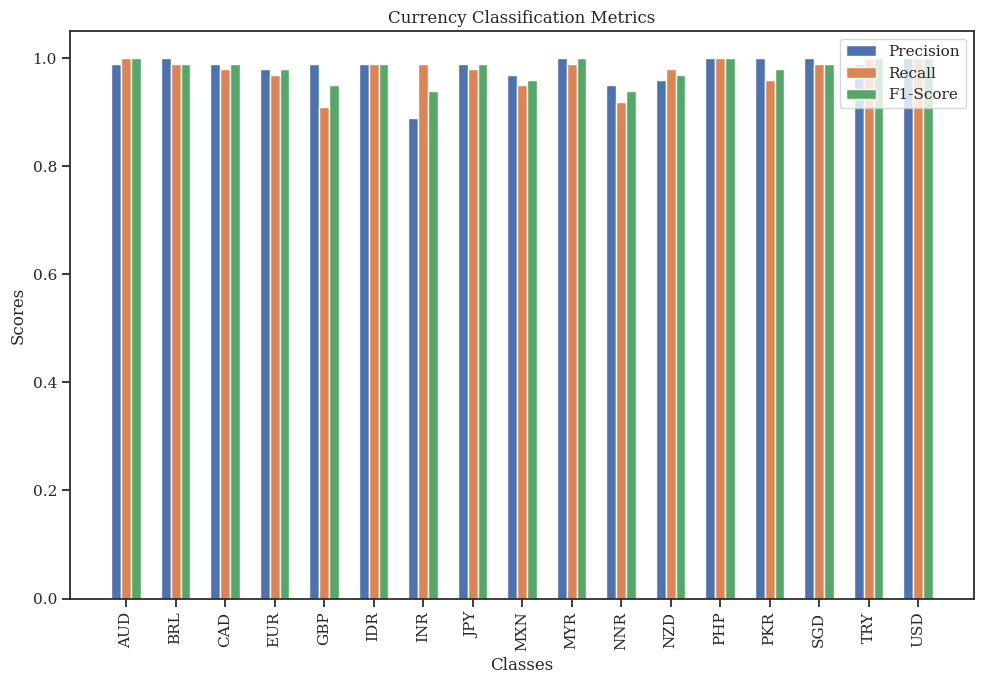

<Figure size 1200x800 with 0 Axes>

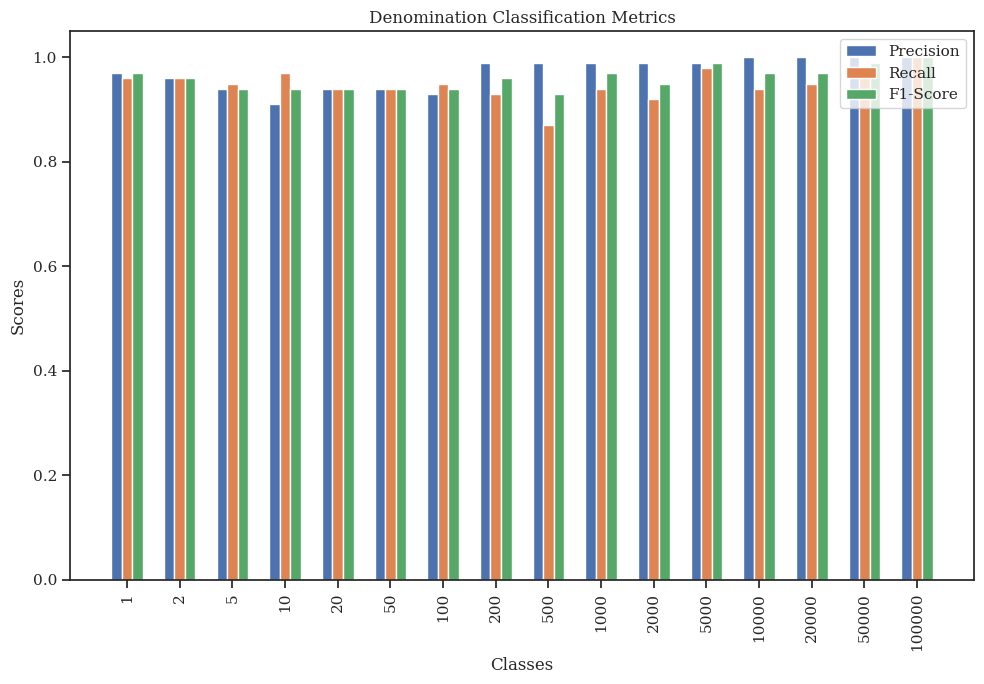

<Figure size 1200x800 with 0 Axes>

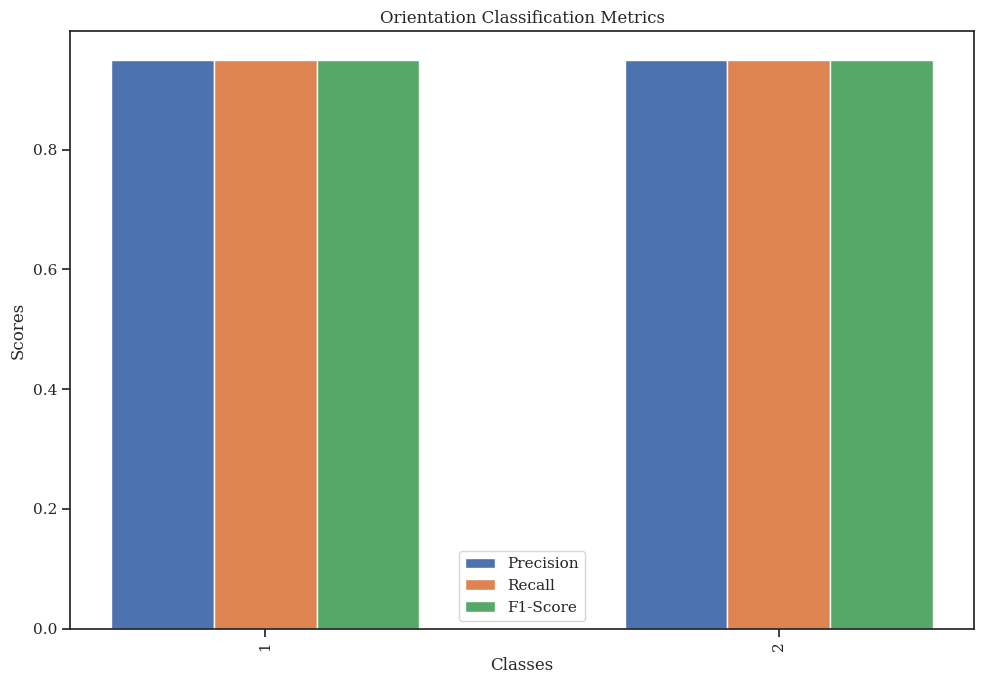

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot metrics
def plot_metrics(metrics, classes, title):
    plt.figure(figsize=(12, 8))
    x = np.arange(len(classes))
    width = 0.2
    
    fig, ax = plt.subplots(figsize=(10, 7))
    rects1 = ax.bar(x - width, metrics['precision'], width, label='Precision')
    rects2 = ax.bar(x, metrics['recall'], width, label='Recall')
    rects3 = ax.bar(x + width, metrics['f1-score'], width, label='F1-Score')
    
    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=90)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Currency metrics
currency_classes = ['AUD', 'BRL', 'CAD', 'EUR', 'GBP', 'IDR', 'INR', 'JPY', 'MXN', 'MYR', 'NNR', 'NZD', 'PHP', 'PKR', 'SGD', 'TRY', 'USD']
currency_metrics = {
    'precision': [0.99, 1.00, 0.99, 0.98, 0.99, 0.99, 0.89, 0.99, 0.97, 1.00, 0.95, 0.96, 1.00, 1.00, 1.00, 0.99, 1.00],
    'recall': [1.00, 0.99, 0.98, 0.97, 0.91, 0.99, 0.99, 0.98, 0.95, 0.99, 0.92, 0.98, 1.00, 0.96, 0.99, 1.00, 1.00],
    'f1-score': [1.00, 0.99, 0.99, 0.98, 0.95, 0.99, 0.94, 0.99, 0.96, 1.00, 0.94, 0.97, 1.00, 0.98, 0.99, 1.00, 1.00]
}
plot_metrics(currency_metrics, currency_classes, 'Currency Classification Metrics')

# Denomination metrics
denomination_classes = [str(d) for d in [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]]
denomination_metrics = {
    'precision': [0.97, 0.96, 0.94, 0.91, 0.94, 0.94, 0.93, 0.99, 0.99, 0.99, 0.99, 0.99, 1.00, 1.00, 1.00, 1.00],
    'recall': [0.96, 0.96, 0.95, 0.97, 0.94, 0.94, 0.95, 0.93, 0.87, 0.94, 0.92, 0.98, 0.94, 0.95, 0.97, 1.00],
    'f1-score': [0.97, 0.96, 0.94, 0.94, 0.94, 0.94, 0.94, 0.96, 0.93, 0.97, 0.95, 0.99, 0.97, 0.97, 0.99, 1.00]
}
plot_metrics(denomination_metrics, denomination_classes, 'Denomination Classification Metrics')

# Orientation metrics
orientation_classes = ['1', '2']
orientation_metrics = {
    'precision': [0.95, 0.95],
    'recall': [0.95, 0.95],
    'f1-score': [0.95, 0.95]
}
plot_metrics(orientation_metrics, orientation_classes, 'Orientation Classification Metrics')


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('banknote_net.csv')

# Extract features and labels
X = df.iloc[:, :-3].values  # 256-dimensional vectors
y_currency = df['Currency'].values
y_denomination = df['Denomination'].str.extract(r'(\d+)')[0].astype(int)  # Extract numerical part of denomination
y_orientation = df['Denomination'].str.extract(r'_(\d)')[0].astype(int)  # Extract orientation

# Encode labels
currency_encoder = LabelEncoder()
denomination_encoder = LabelEncoder()
orientation_encoder = LabelEncoder()

y_currency_encoded = currency_encoder.fit_transform(y_currency)
y_denomination_encoded = denomination_encoder.fit_transform(y_denomination)
y_orientation_encoded = orientation_encoder.fit_transform(y_orientation)

# Train-test split
X_train, X_test, y_currency_train, y_currency_test, y_denomination_train, y_denomination_test, y_orientation_train, y_orientation_test = train_test_split(
    X, y_currency_encoded, y_denomination_encoded, y_orientation_encoded, test_size=0.2, random_state=42
)


In [19]:
currency_classifier = KNeighborsClassifier(n_neighbors=25)
denomination_classifier = KNeighborsClassifier(n_neighbors=25)
orientation_classifier = KNeighborsClassifier(n_neighbors=25)


# Train classifiers
currency_classifier.fit(X_train, y_currency_train)
denomination_classifier.fit(X_train, y_denomination_train)
orientation_classifier.fit(X_train, y_orientation_train)


KNeighborsClassifier(n_neighbors=25)

In [20]:
# Predict on the test set
y_currency_pred = currency_classifier.predict(X_test)
y_denomination_pred = denomination_classifier.predict(X_test)
y_orientation_pred = orientation_classifier.predict(X_test)


Currency Classification Report:
              precision    recall  f1-score   support

         AUD       1.00      1.00      1.00       322
         BRL       1.00      1.00      1.00       441
         CAD       1.00      1.00      1.00       245
         EUR       1.00      1.00      1.00       386
         GBP       1.00      1.00      1.00       211
         IDR       1.00      1.00      1.00       241
         INR       1.00      1.00      1.00       374
         JPY       1.00      1.00      1.00       321
         MXN       1.00      1.00      1.00       218
         MYR       1.00      1.00      1.00       238
         NNR       1.00      1.00      1.00       184
         NZD       1.00      1.00      1.00       222
         PHP       1.00      1.00      1.00       235
         PKR       1.00      1.00      1.00       226
         SGD       1.00      1.00      1.00       200
         TRY       1.00      1.00      1.00       598
         USD       1.00      1.00      1.00      

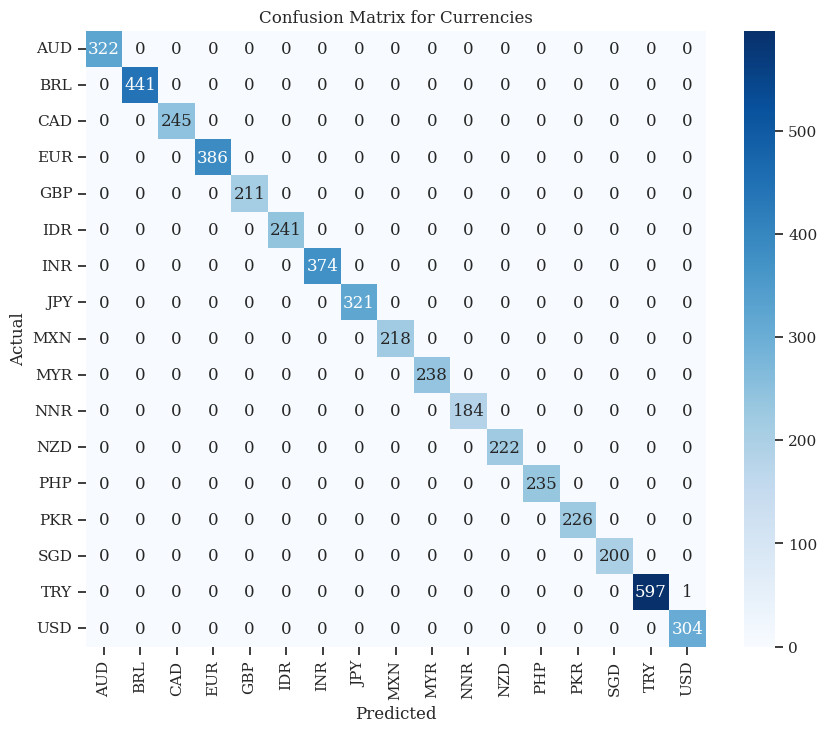

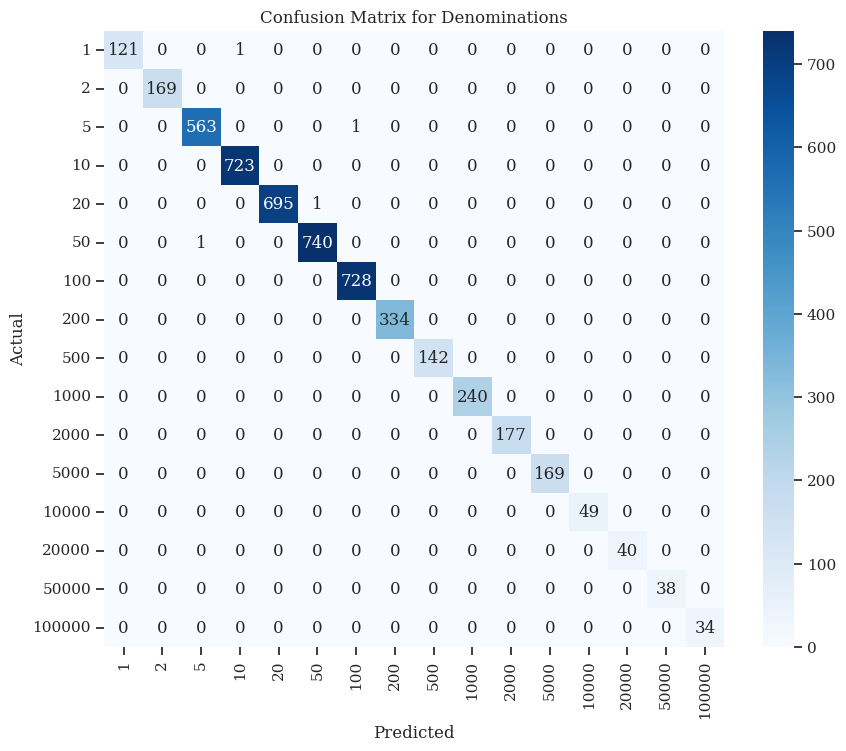

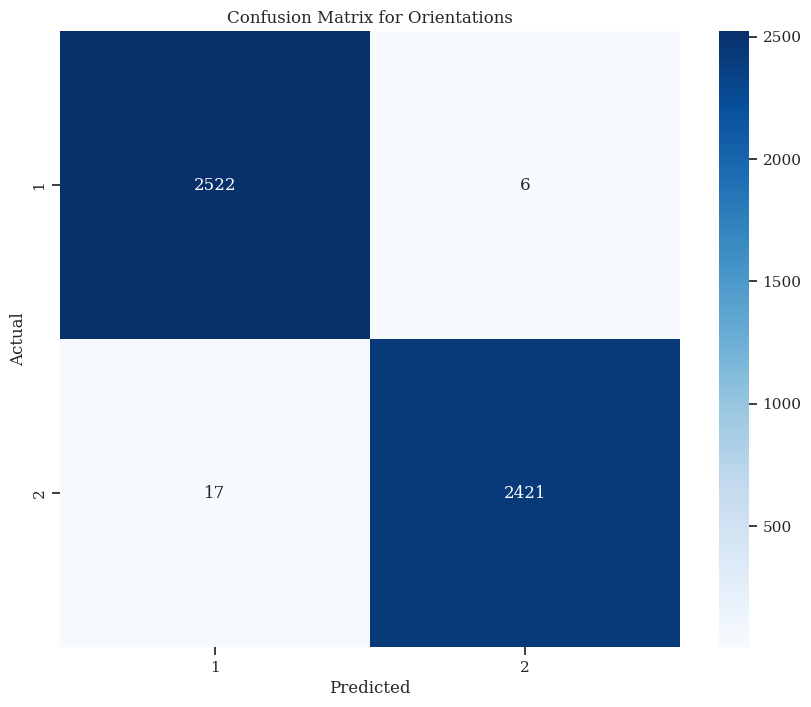

In [21]:
# Convert encoded labels back to their original class names for reporting
currency_classes = currency_encoder.classes_
denomination_classes = denomination_encoder.classes_
orientation_classes = orientation_encoder.classes_

# Print classification reports
print("Currency Classification Report:")
print(classification_report(y_currency_test, y_currency_pred, target_names=currency_classes))

print("Denomination Classification Report:")
print(classification_report(y_denomination_test, y_denomination_pred, target_names=[str(label) for label in denomination_classes]))

print("Orientation Classification Report:")
print(classification_report(y_orientation_test, y_orientation_pred, target_names=[str(label) for label in orientation_classes]))

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, classes, title):
    plt.figure(figsize=(10, 8))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_currency_test, y_currency_pred, currency_classes, 'Confusion Matrix for Currencies')
plot_confusion_matrix(y_denomination_test, y_denomination_pred, [str(label) for label in denomination_classes], 'Confusion Matrix for Denominations')
plot_confusion_matrix(y_orientation_test, y_orientation_pred, [str(label) for label in orientation_classes], 'Confusion Matrix for Orientations')


# checking for overfitting

In [22]:
# Train accuracy
train_accuracy_currency = currency_classifier.score(X_train, y_currency_train)
train_accuracy_denomination = denomination_classifier.score(X_train, y_denomination_train)
train_accuracy_orientation = orientation_classifier.score(X_train, y_orientation_train)

# Test accuracy
test_accuracy_currency = currency_classifier.score(X_test, y_currency_test)
test_accuracy_denomination = denomination_classifier.score(X_test, y_denomination_test)
test_accuracy_orientation = orientation_classifier.score(X_test, y_orientation_test)

print("Training Accuracy (Currency):", train_accuracy_currency)
print("Test Accuracy (Currency):", test_accuracy_currency)

print("Training Accuracy (Denomination):", train_accuracy_denomination)
print("Test Accuracy (Denomination):", test_accuracy_denomination)

print("Training Accuracy (Orientation):", train_accuracy_orientation)
print("Test Accuracy (Orientation):", test_accuracy_orientation)


Training Accuracy (Currency): 0.9998992950654582
Test Accuracy (Currency): 0.999798630688683
Training Accuracy (Denomination): 0.9995971802618329
Test Accuracy (Denomination): 0.9991945227547322
Training Accuracy (Orientation): 0.997079556898288
Test Accuracy (Orientation): 0.99536850583971


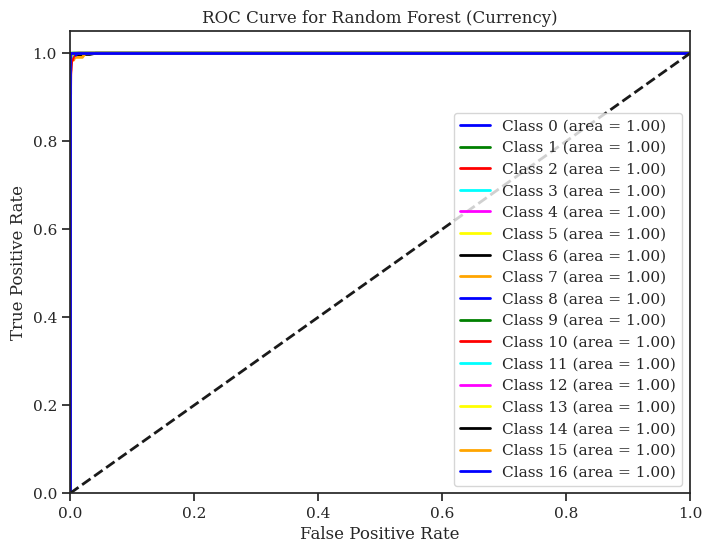

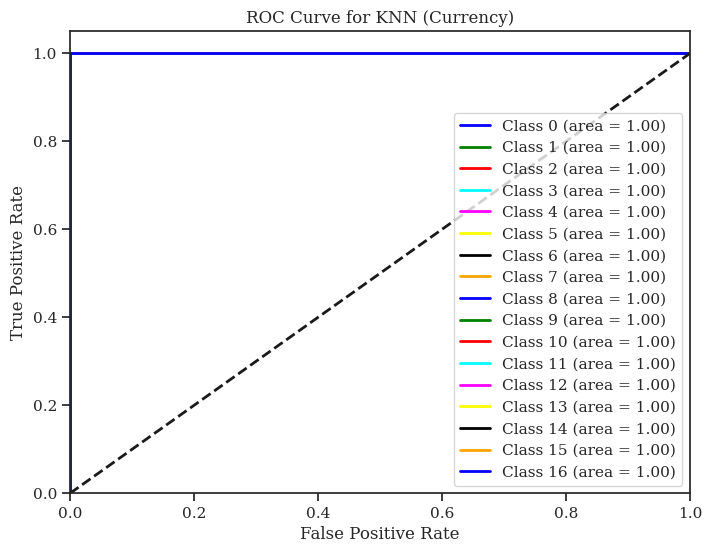

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Convert labels to binary format for ROC curve
y_currency_binary = label_binarize(y_currency_encoded, classes=np.unique(y_currency_encoded))
y_denomination_binary = label_binarize(y_denomination_encoded, classes=np.unique(y_denomination_encoded))
y_orientation_binary = label_binarize(y_orientation_encoded, classes=np.unique(y_orientation_encoded))

# Split data for ROC curve calculation
X_train, X_test, y_currency_train, y_currency_test = train_test_split(
    X, y_currency_binary, test_size=0.2, random_state=42
)

# Random Forest Classifier for Currency
rf_currency_classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rf_currency_classifier.fit(X_train, y_currency_train)
y_currency_rf_score = rf_currency_classifier.predict_proba(X_test)

# KNN Classifier for Currency
knn_currency_classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=25))
knn_currency_classifier.fit(X_train, y_currency_train)
y_currency_knn_score = knn_currency_classifier.predict_proba(X_test)

# Plot ROC curve for Random Forest
def plot_roc_curve(y_test, y_score, n_classes, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange'])
    plt.figure(figsize=(8, 6))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Number of classes
n_currency_classes = y_currency_binary.shape[1]

# Plot ROC curves
plot_roc_curve(y_currency_test, y_currency_rf_score, n_currency_classes, 'ROC Curve for Random Forest (Currency)')
plot_roc_curve(y_currency_test, y_currency_knn_score, n_currency_classes, 'ROC Curve for KNN (Currency)')
